# Importing The Modules Required Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import codecs
%matplotlib inline




from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score , accuracy_score , confusion_matrix, ConfusionMatrixDisplay

# Importing The IMDB Dataset 

In [3]:

df = pd.read_csv(r"C:\Users\anvay\OneDrive\Desktop\IMDB_Dataset.csv" , encoding = 'ISO-8859-1')


# Pre-processing The Dataset

In [4]:
df.head(15)

review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three prisoners who ...  positive

In [5]:
df.tail(15)

review sentiment
49985  Imaginary Heroes is clearly the best film of t...  positive
49986  This movie is a disgrace to the Major League F...  negative
49987  A remake of Alejandro Amenabar's Abre los Ojos...  negative
49988  When I first tuned in on this morning news, I ...  negative
49989  I got this one a few weeks ago and love it! It...  positive
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...  negative
49991  Les Visiteurs, the first movie about the medie...  negative
49992  John Garfield plays a Marine who is blinded by...  positive
49993  Robert Colomb has two full-time jobs. He's kno...  negative
49994  This is your typical junk comedy.<br /><br />T...  negative
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

In [6]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
df.shape

(50000, 2)

#### Checking for total number of unique values in sentiments

In [9]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

#### Checking for any null tuples in the dataset

In [10]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

#### Re-labeling positive to 1 and negative to 0 in sentiments 

In [11]:
labeling = {
    'positive':1, 
    'negative':0
}

In [12]:

df['sentiment'] = df['sentiment'].apply(lambda x : labeling[x])

In [13]:
df.head(15)

review  sentiment
0   One of the other reviewers has mentioned that ...          1
1   A wonderful little production. <br /><br />The...          1
2   I thought this was a wonderful way to spend ti...          1
3   Basically there's a family where a little boy ...          0
4   Petter Mattei's "Love in the Time of Money" is...          1
5   Probably my all-time favorite movie, a story o...          1
6   I sure would like to see a resurrection of a u...          1
7   This show was an amazing, fresh & innovative i...          0
8   Encouraged by the positive comments about this...          0
9   If you like original gut wrenching laughter yo...          1
10  Phil the Alien is one of those quirky films wh...          0
11  I saw this movie when I was about 12 when it c...          0
12  So im not a big fan of Boll's work but then ag...          0
13  The cast played Shakespeare.<br /><br />Shakes...          0
14  This a fantastic movie of three prisoners who ...          1

In [14]:
df.tail(15)

review  sentiment
49985  Imaginary Heroes is clearly the best film of t...          1
49986  This movie is a disgrace to the Major League F...          0
49987  A remake of Alejandro Amenabar's Abre los Ojos...          0
49988  When I first tuned in on this morning news, I ...          0
49989  I got this one a few weeks ago and love it! It...          1
49990  Lame, lame, lame!!! A 90-minute cringe-fest th...          0
49991  Les Visiteurs, the first movie about the medie...          0
49992  John Garfield plays a Marine who is blinded by...          1
49993  Robert Colomb has two full-time jobs. He's kno...          0
49994  This is your typical junk comedy.<br /><br />T...          0
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

##  Exploratory Data Analysis

#### Plotting the distribution Of Positive and Negative Reviews

<Axes: xlabel='sentiment'>

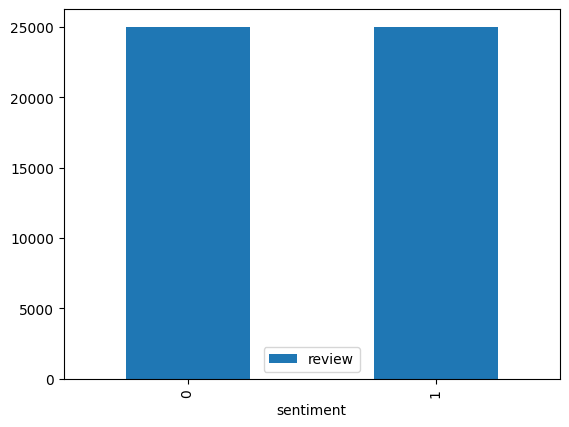

In [15]:

df.groupby('sentiment').count().plot(kind='bar')


#### Calculating The length of the reviews

##### Plotting the box plot for the length

<Axes: >

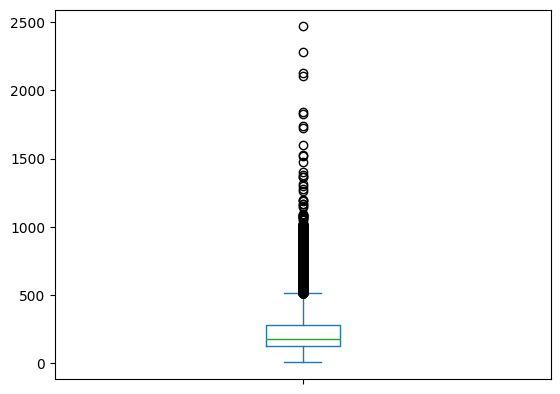

In [16]:
# Calculate review lengths
review_length = pd.Series([len(review.split()) for review in df['review']])

# The distribution of review text lengths
review_length.plot(kind='box')

c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

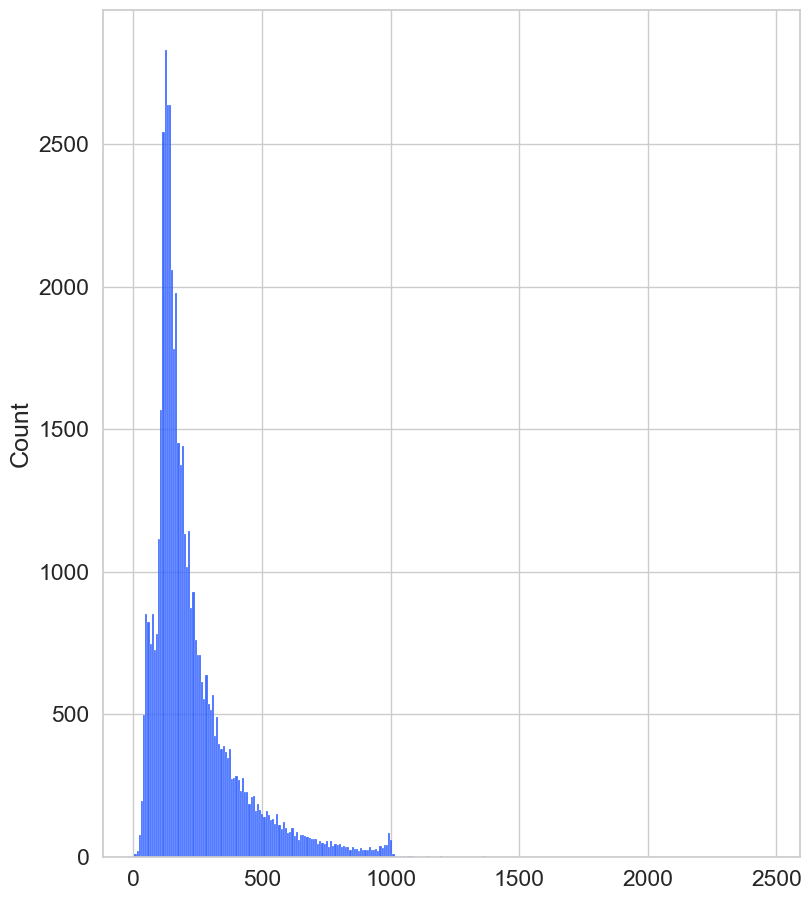

In [17]:
sns.set_theme(
    context='notebook',
    style='whitegrid',
    palette='bright',
    font='sans-serif',
    font_scale=1.5,
    color_codes=True,
    rc=None,
)

plt.figure(figsize = (9,11))
sns.histplot(review_length)

#### Analysis for only positive reviews

c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


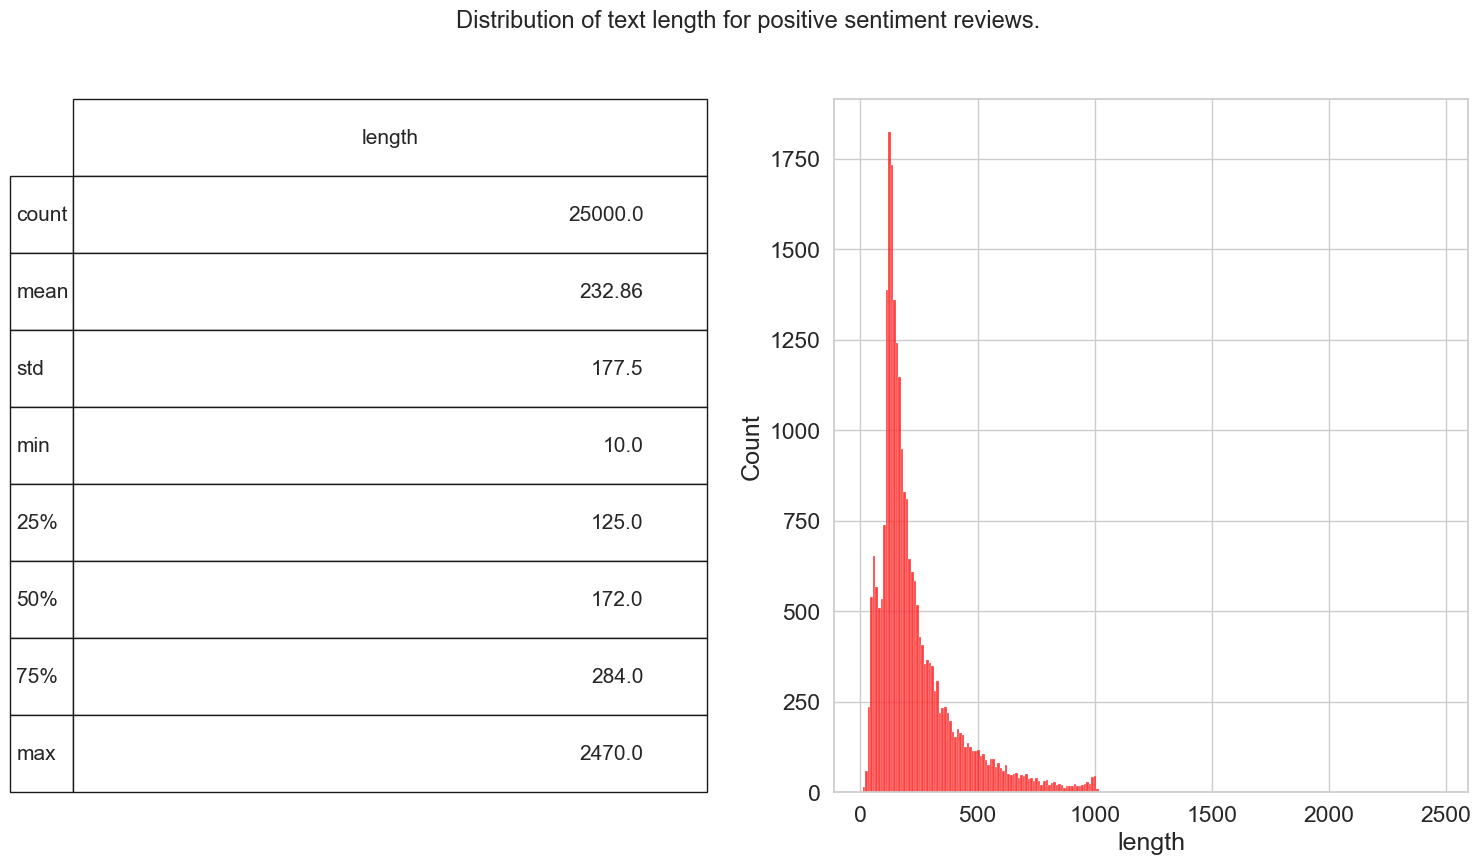

In [18]:
fig = plt.figure(figsize=(18,9))
df['length'] = df.review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']==1]['length'], ax=ax1,color='red')
describe = df.length[df.sentiment==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 15
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=17)

plt.show()

#### Analysis for only negative reviews

c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


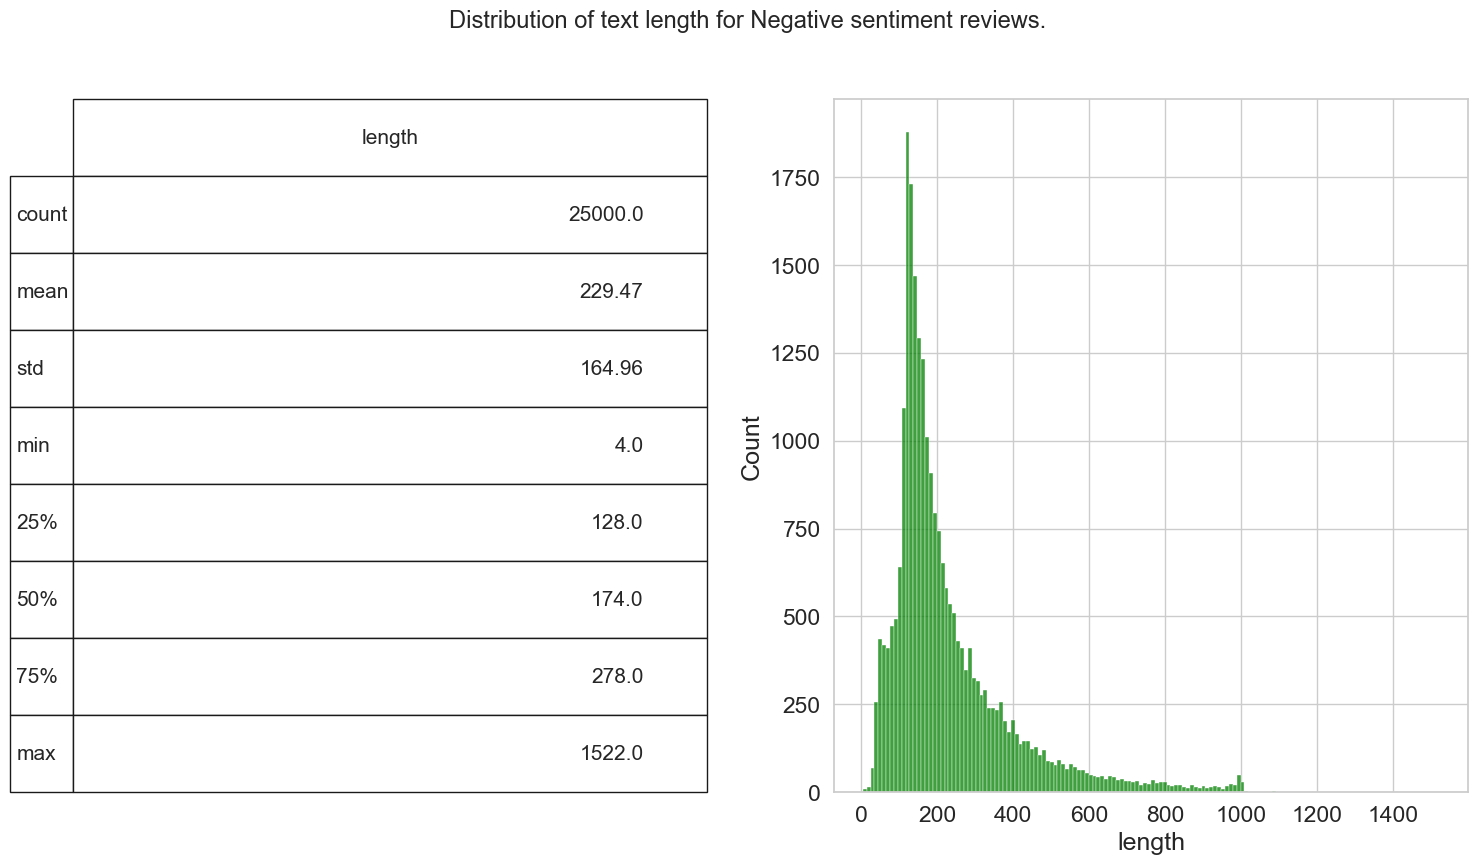

In [19]:
fig = plt.figure(figsize=(18,9))
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']==0]['length'], ax=ax1,color='green')
describe = df.length[df.sentiment==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 15
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=17)

plt.show()

#### Wordcloud for Postive Text in Reviews

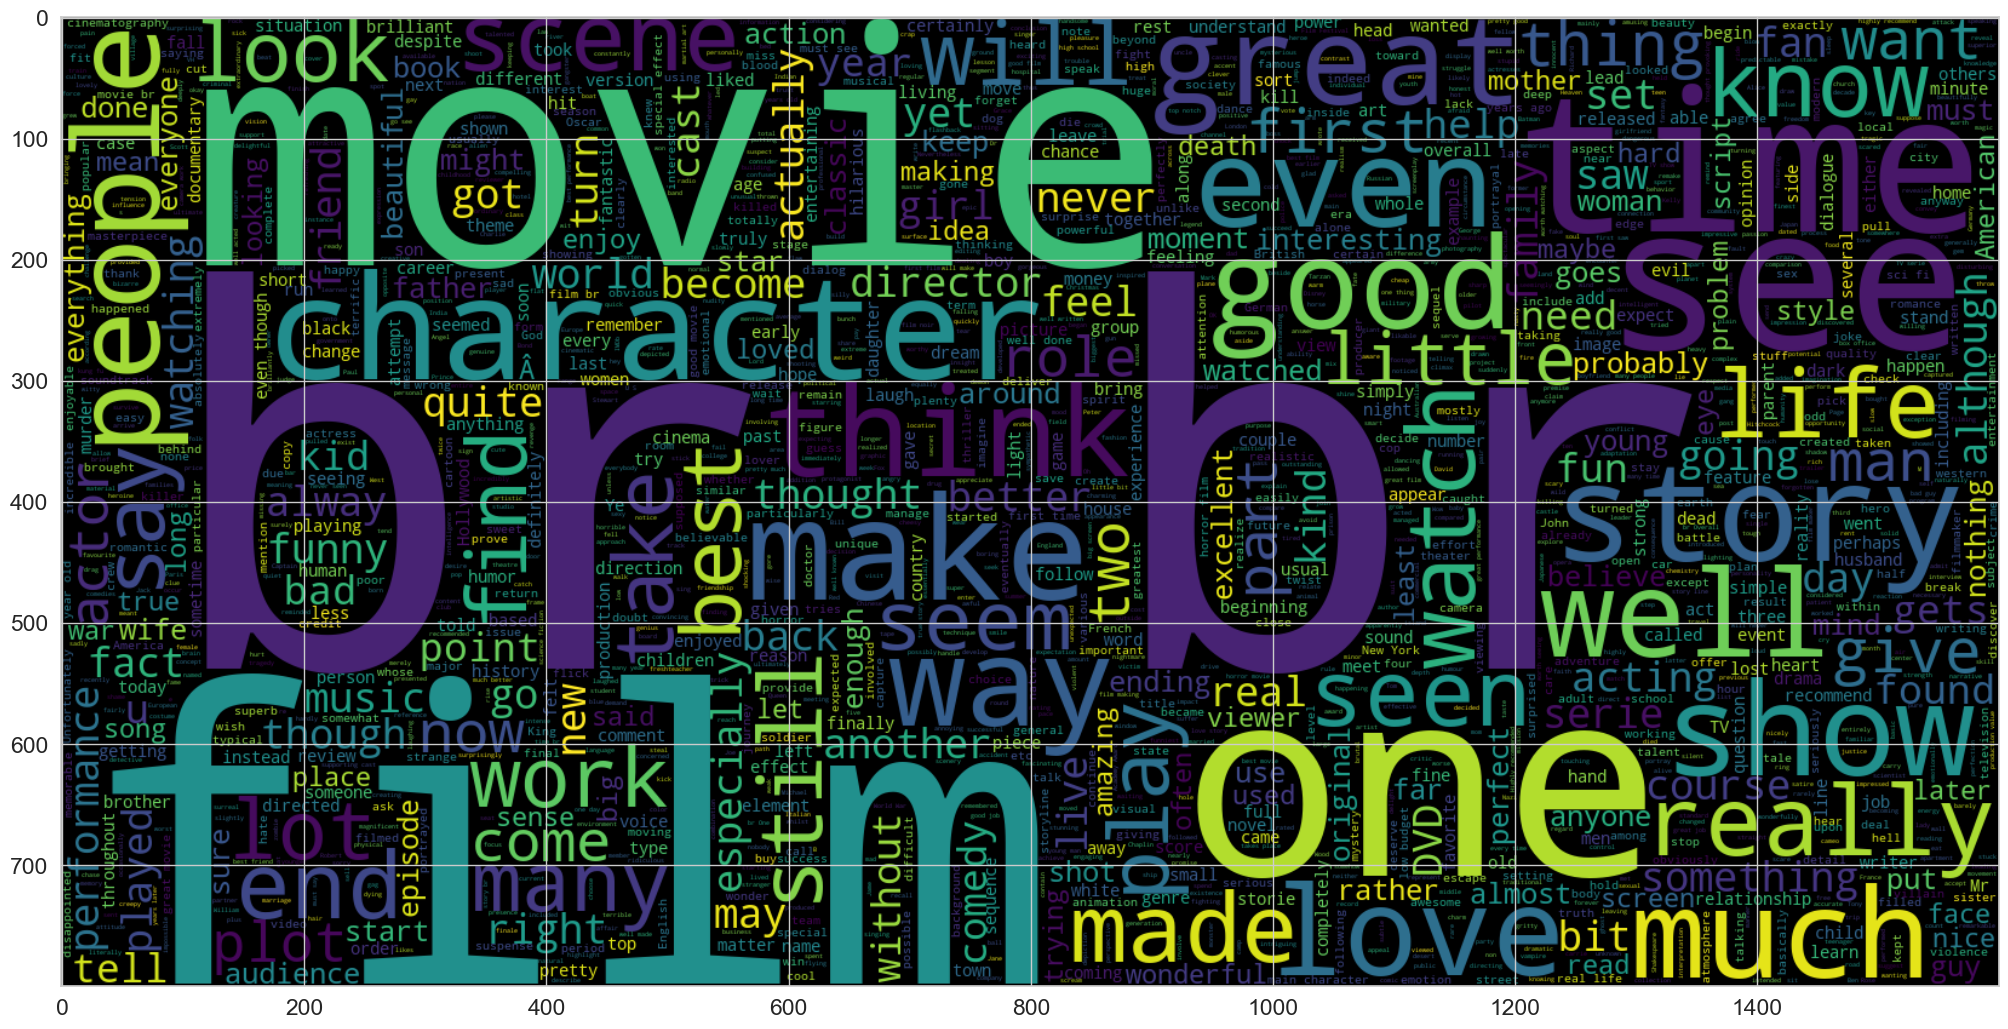

In [20]:
from wordcloud import WordCloud
plt.figure(figsize = (25,25)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

#### Wordcloud for Negative Text in Reviews

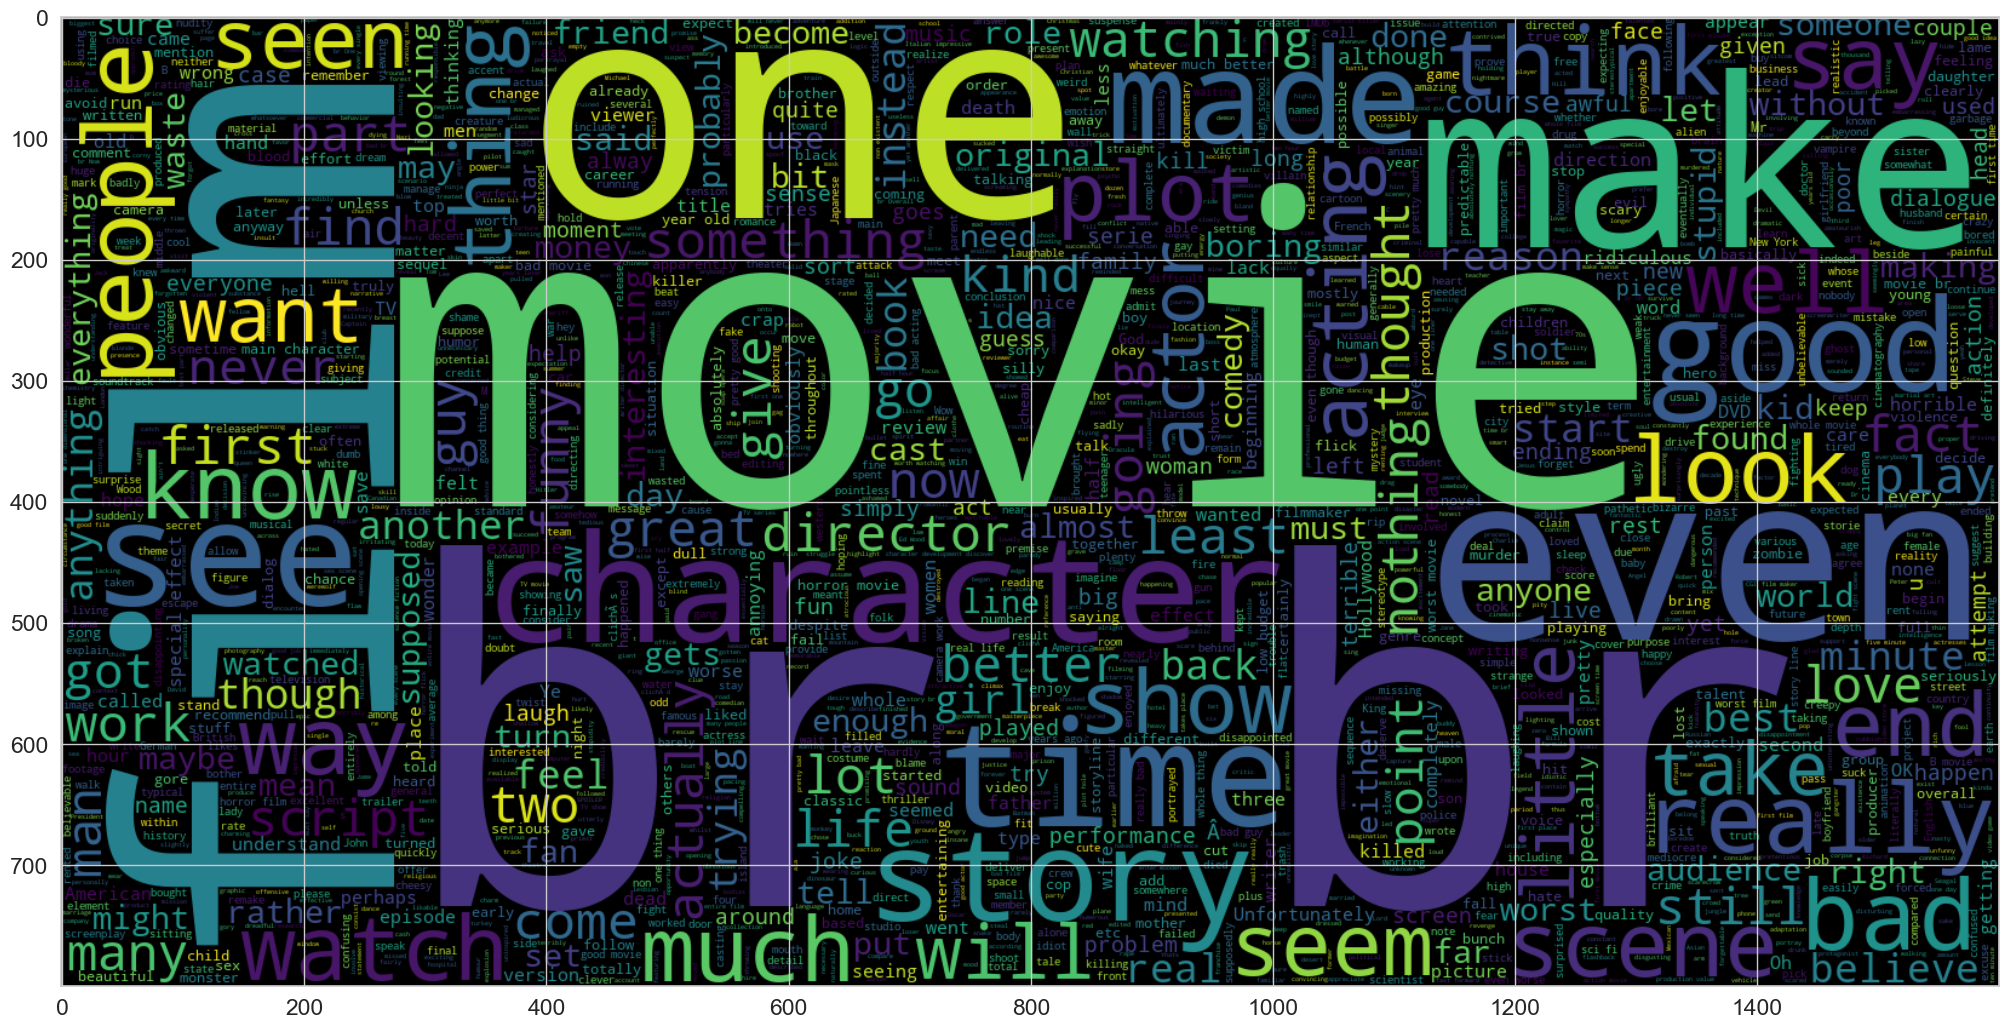

In [21]:
from wordcloud import WordCloud
plt.figure(figsize = (25,25)) # Negative Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

## Trainning The Models 

#### Vectorize The Reviews

In [22]:
tfidf = TfidfVectorizer()

#### Extracting features and Labels

In [23]:
X = df['review']
y = df['sentiment']

#### Train , Test & Split the dataset for model trainning

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Trainng The Logistic Regression Model

In [25]:
model_Logistic = make_pipeline(TfidfVectorizer(max_features=5000, stop_words='english'), LogisticRegression())


model_Logistic.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('logisticregression', LogisticRegression())])

##### Finding Out The Model Accuracy

In [26]:
accuracy_Logi = model_Logistic.score(X_test, y_test)
print(f"Model accuracy: {accuracy_Logi}")



predictions_Logi = model_Logistic.predict(X_test)


Model accuracy: 0.8896


##### Printing The Confusion Matrix for Logistic Regression Model

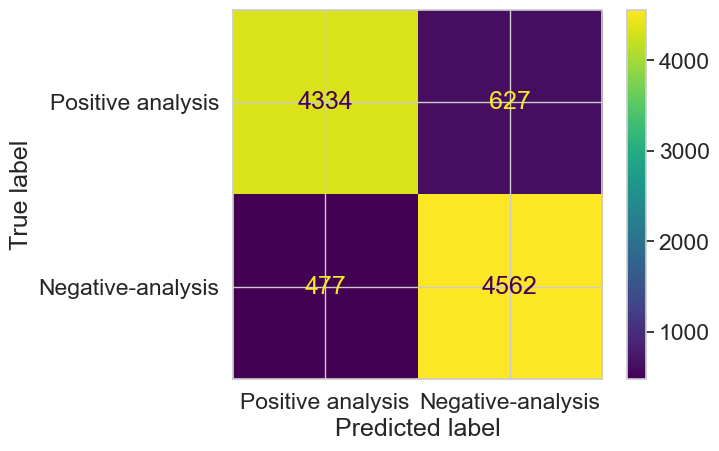

In [27]:
cm = confusion_matrix(y_test ,predictions_Logi , labels = model_Logistic.classes_)
cm_dis = ConfusionMatrixDisplay( confusion_matrix = cm , display_labels = ['Positive analysis' , 'Negative-analysis'])
cm_dis.plot()

### Trainng The Support Vector Machine Model

In [28]:
model_SVM = make_pipeline(TfidfVectorizer(max_features=5000, stop_words='english'), SVC())


model_SVM.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('svc', SVC())])

#### Finding Out The Model Accuracy

In [29]:
accuracy_svm = model_SVM.score(X_test, y_test)
print(f"Model accuracy: {accuracy_svm}")



predictions_svm = model_SVM.predict(X_test)


Model accuracy: 0.8924


##### Printing The Confusion Matrix For SVM

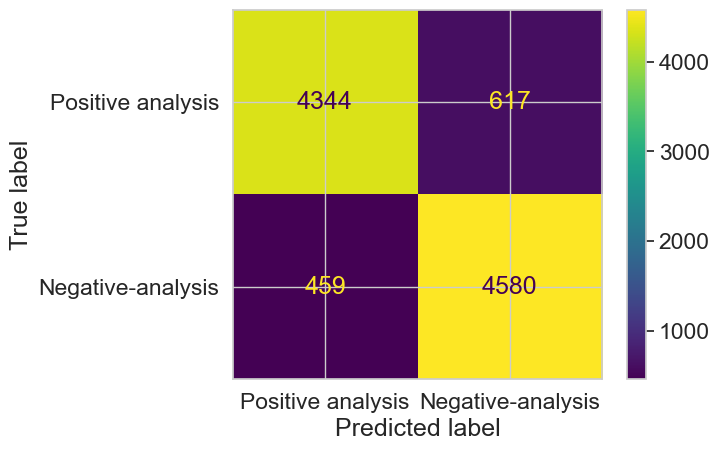

In [30]:
cm1 = confusion_matrix(y_test ,predictions_svm , labels = model_SVM.classes_)
cm_dist = ConfusionMatrixDisplay( confusion_matrix = cm1 , display_labels = ['Positive analysis' , 'Negative-analysis'])
cm_dist.plot()

### Trainng The Random Forest Model

In [31]:
model_forest = make_pipeline(TfidfVectorizer(max_features=5000, stop_words='english'), RandomForestClassifier(n_estimators=100))


model_forest.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('randomforestclassifier', RandomForestClassifier())])

#### Finding Out The Model Accuracy

In [32]:
accuracy_forest = model_SVM.score(X_test, y_test)
print(f"Model accuracy: {accuracy_forest}")



predictions_forest = model_forest.predict(X_test)


Model accuracy: 0.8924


##### Printing The Confusion Matrix For Random Forest

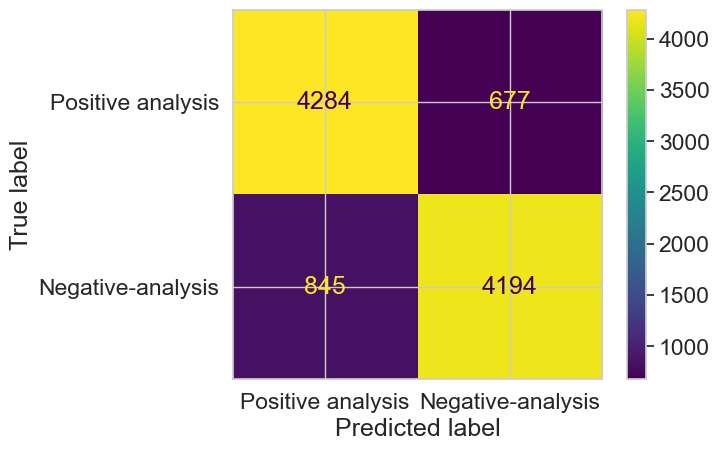

In [33]:
cm12 = confusion_matrix(y_test ,predictions_forest , labels = model_forest.classes_)
cm_dist1 = ConfusionMatrixDisplay( confusion_matrix = cm12 , display_labels = ['Positive analysis' , 'Negative-analysis'])
cm_dist1.plot()

### Comparing The Accuracies Of various Data Models

In [37]:
accuracies = {
    "Logistic Regression": 0.8896,  
    "Support Vector Machine": 0.8924,
    "Random Forest": 0.8924
}
accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])


#### Plotting a Bar Plot For Comparison

c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


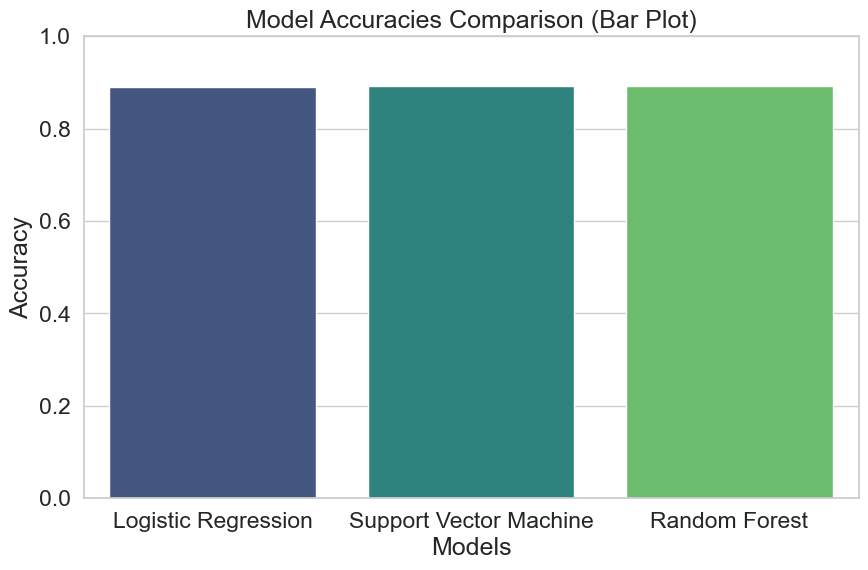

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracies_df, palette='viridis')
plt.title('Model Accuracies Comparison (Bar Plot)')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

#### Plotting A Line Plot for The Comparison

c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\anvay\AppData\Local\Temp\ipykernel_29020\504793015.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Model', y='Accuracy', data=accuracies_df, marker='o', palette='viridis')
c:\Users\anvay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

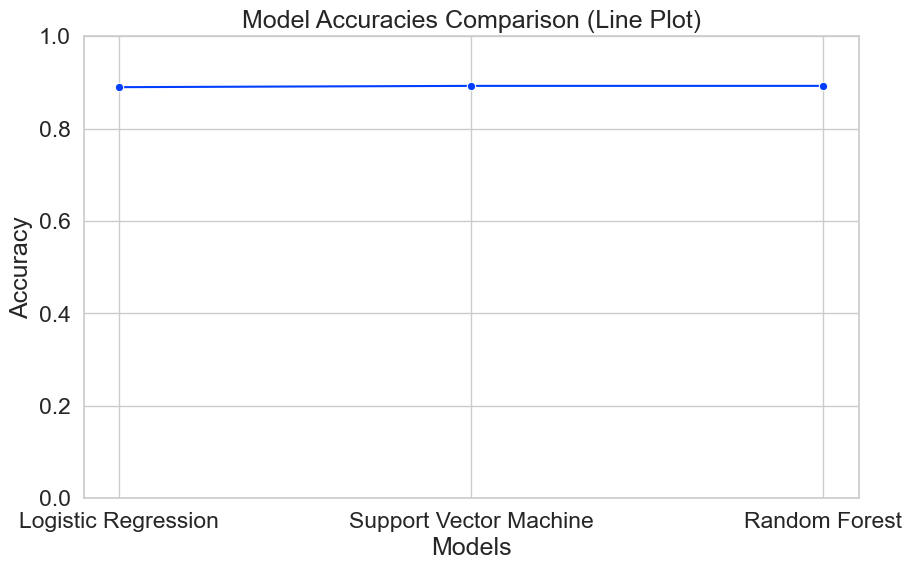

In [39]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=accuracies_df, marker='o', palette='viridis')
plt.title('Model Accuracies Comparison (Line Plot)')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

### Taking reviews from User and Classifying It as Positive or negative with our Trained Models

In [47]:
def classify_review(review, logistic_model, svm_model, rf_model):
    predictions = {}
    prediction_lr = logistic_model.predict([review])
    sentiment_lr = 'Positive' if prediction_lr == 1 else 'Negative'
    predictions["Logistic Regression"] = sentiment_lr
    
    prediction_svm = svm_model.predict([review])
    sentiment_svm = 'Positive' if prediction_svm == 1 else 'Negative'
    predictions["Support Vector Machine"] = sentiment_svm
    
    prediction_rf = rf_model.predict([review])
    sentiment_rf = 'Positive' if prediction_rf == 1 else 'Negative'
    predictions["Random Forest"] = sentiment_rf
    
    # Count positive predictions
    positive_count = sum([prediction_lr, prediction_svm, prediction_rf])
    
    # Determine final sentiment based on majority vote
    final_sentiment = 'Positive' if positive_count >= 2 else 'Negative'
    
    return predictions, final_sentiment

# Take review input from user
user_review = input("Enter a movie review: ")

# Classify the review with all models
predictions, final_sentiment = classify_review(user_review, model_Logistic, model_SVM, model_forest)

# Display the predictions
print(f"Review: {user_review}")
for model_name, sentiment in predictions.items():
    print(f"{model_name}: {sentiment}")
    
print(f"Final Sentiment based on majority vote: {final_sentiment}")

Review: it was okaish
Logistic Regression: Negative
Support Vector Machine: Positive
Random Forest: Positive
Final Sentiment based on majority vote: Positive
